In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
census_population = pd.read_csv('2010+Census+Population+By+Zipcode+(ZCTA).csv',index_col=0)
permits_dob = pd.read_csv('Historical_DOB_Permit_Issuance.csv')

C:\Users\subint\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,9,10,15,31,33,36,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


What fraction of all construction permits in this data set correspond to renewed permits? The filing type is recorded under column 'Filing Status'. For first-time permits the value in this column is 'INITIAL' and for renewed permits it is 'RENEWAL'.

In [3]:
permits_dob[permits_dob["Filing Status"] == "RENEWAL"]["Filing Status"].count()/permits_dob["Filing Status"].count()

0.23756920864755

The filing type of a permit is recorded under column 'Filing Status'. For first-time permits the value in this column is 'INITIAL' and for renewed permits it is 'RENEWAL'. What kind of an owner the permit was issued to is recorded in the column "Owner's Business Type", for corporations the value is 'CORPORATION', for individuals it is 'INDIVIDUAL'. If you consider only renewed permits, what is the ratio of the number of permits issued to corporations to the number of permits issued to individuals?

In [4]:
corp_count = permits_dob[ (permits_dob["Filing Status"] == "RENEWAL") & (permits_dob["Owner\'s Business Type"] == "CORPORATION")]["Owner\'s Business Type"].count()
indv_count = permits_dob[ (permits_dob["Filing Status"] == "RENEWAL") & (permits_dob["Owner\'s Business Type"] == "INDIVIDUAL")]["Owner\'s Business Type"].count()
corp_count/indv_count

1.0805818771914573

Consider only those permits that were issued for more than 365 days. The date on which a permit was issued is recorded in column 'Issuance Date', the date the permit expires is in column 'Expiration Date'. What fraction of these at least year-long permits were issued in the borough with the highest number of such permits? The borough where the construction will take place is in column 'BOROUGH'.

In [5]:
expDate = permits_dob["Expiration Date"]
issDate = permits_dob["Issuance Date"]
Length = pd.to_timedelta(pd.to_datetime(expDate) - pd.to_datetime(issDate))

In [6]:
permits_dob[Length.dt.days > 365]["BOROUGH"].value_counts().max() / permits_dob[Length.dt.days > 365]["BOROUGH"].value_counts().sum()

0.44938589413557717

Observe how the number of issued permits changes accross the years. Limit your analysis to years 1990-2012 (both inclusive). What is the coefficient of determination (R squared) between the year a permit was issued and the number of issued permits that year? The column recording the date when a permit was issued is called 'Issuance Date'

In [7]:
issDate = pd.to_datetime(issDate).dt.year

In [8]:
r_Data =  issDate[issDate.between(1990,2012)].value_counts()
x  = r_Data.index.to_list()
y  = r_Data.to_list()
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value * r_value

0.906820212281698

Limit your analysis to permits that were filed in 2010. The column recording the date of permit filing is called 'Filing Date'. For each ZIP code compute the ratio between the number of permits issued in 2010 and number of residents in that ZIP code. Make sure to discard any ZIP codes with population lower than 1000 people. Note: you will need to use both the DOB permits dataset and the US Census dataset. In the DOB permits dataset, the ZIP code is recorded under column 'Postcode'. How many ZIP codes are outliers in terms of number of construction permits per number of people - more specificaly, for how many ZIP codes does this computed ratio exceed the mean by more than twice the standard deviation?

In [9]:
census = census_population[census_population["2010 Census Population"] > 1000]
permits_2010 = permits_dob[pd.to_datetime(permits_dob["Filing Date"]).dt.year == 2010]["Postcode"].value_counts()
census.index = census.index.astype('float64')

In [10]:
comList = list(set(permits_2010.index.to_list()).intersection(census.index.to_list()))
permits = permits_2010[permits_2010.index.isin(comList)].sort_index()
census = census[census.index.isin(comList)].sort_index()

In [11]:
x = permits.values / census["2010 Census Population"].values
max_x = x.mean() + 2*x.std()
min_x = x.mean() - 2*x.std()
(x > max_x).sum() + (x < min_x).sum()

9

Text(0, 0.5, 'PDF')

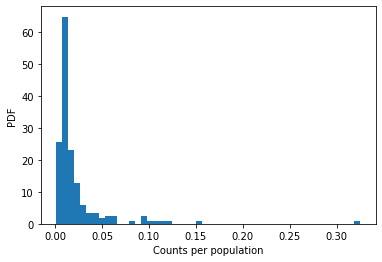

In [12]:
plt.hist(x, bins = 50, density=True)
plt.xlabel("Counts per population")
plt.ylabel("PDF")

Let's investigate how the number of construction jobs that start in the summer vs the winter changes across the years. The date of construction job start is recorded in column 'Job Start Date'. For every year, compute the ratio between the number of construction jobs that start in the peak of summer (in July and August) and the number of jobs that start in the peak of winter (in January and February). Again limit your analysis to years 1990-2012 (both inclusive). Find the year when this ratio was maximal - what was the value of this ratio for that year?

In [13]:
job_start_date = pd.to_datetime(permits_dob["Job Start Date"],errors='coerce')
job_start_date = job_start_date[(job_start_date.dt.year >= 1990) & (job_start_date.dt.year<=2012)]
j_data = pd.DataFrame()
j_data["M"] = job_start_date.dt.month
j_data["Y"] = job_start_date.dt.year

In [14]:
Smr = j_data[((j_data["M"] == 8) | (j_data["M"] == 7)) & ((j_data["Y"] >= 1990) & (j_data["Y"] <= 2012))]["Y"].value_counts()
Wtr = j_data[((j_data["M"] == 1) | (j_data["M"] == 2)) & ((j_data["Y"] >= 1990) & (j_data["Y"] <= 2012))]["Y"].value_counts()
Smr = Smr.sort_index()
Wtr = Wtr.sort_index()
Smr.div(Wtr).max()

3.8049555273189326

In [15]:
Smr.div(Wtr).idxmax()

1990